In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,mean_squared_error,r2_score
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [4]:
m,n=df.shape
# m=no. of examples
# n= no. of columns

In [5]:
m

1697

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [7]:
# Checking the null values

In [8]:
print(df['input'].isnull().sum())
print(df['output'].isnull().sum())

1
1


In [9]:
df[df['input'].isnull()]

,input,output
1439,NaN,NaN


In [10]:
df=df.dropna()

In [11]:
m,n=df.shape

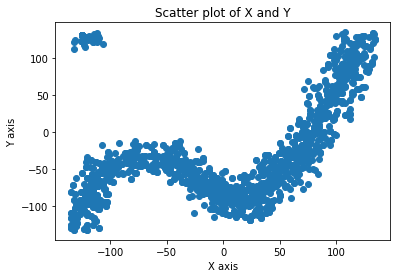

In [12]:
plt.scatter(df['input'],df['output'])
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Scatter plot of X and Y')
plt.show()

In [13]:
#From this observation it shows that there are some outliers in the dataset
#And the the relation is  a non-linear relation between the input and output values

In [14]:
#With out outliers
data=df[~((df['input']<0)&(df['output']>100))]

In [15]:
data.shape

(1657, 2)

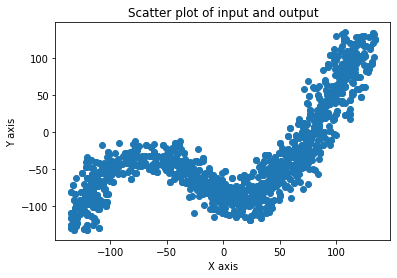

In [16]:
plt.scatter(data['input'],data['output'])
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Scatter plot of input and output')
plt.show()

In [17]:
data.describe()

,input,output
count,1657.000000,1657.000000
mean,4.026504,-37.848459
std,77.655526,61.739562
min,-134.962839,-132.422167
25%,-58.376065,-81.000000
50%,12.623779,-51.665133
75%,71.018883,-17.584021
max,134.605775,134.425495


In [18]:
data.corr()

,input,output
input,1.000000,0.665554
output,0.665554,1.000000


### Building Model 

#### Linear regression

In [19]:
X=data[['input']]
Y=data['output']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [20]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1325, 1)
(1325,)
(332, 1)
(332,)


In [21]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [22]:
Y_pred=regressor.predict(X_test)

In [23]:
mse=mean_squared_error(Y_test,Y_pred)
r2=r2_score(Y_test,Y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 2014.77
R^2 Score: 0.44


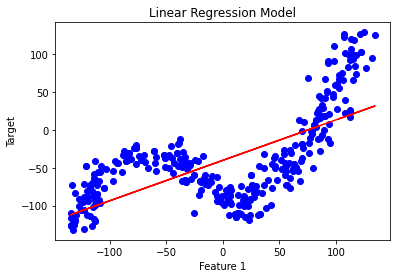

In [24]:
plt.scatter(X_test, Y_test, color='blue')
plt.plot(X_test['input'],Y_pred,color='red')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Linear Regression Model')
plt.show()

#### Polynomial Regression

In [25]:
# Train test split is already done in previous section

In [26]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1325, 1)
(1325,)
(332, 1)
(332,)


In [27]:
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X_train)

In [28]:
reg=LinearRegression().fit(X_poly, Y_train)

In [29]:
X_test_poly=poly.fit_transform(X_test)
Y_pred=reg.predict(X_test_poly)

In [30]:
mse=mean_squared_error(Y_test,Y_pred)
r2=r2_score(Y_test,Y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 1331.97
R^2 Score: 0.63


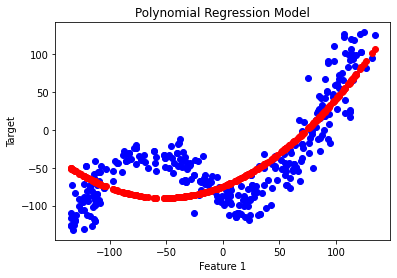

In [31]:
plt.scatter(X_test, Y_test, color='blue')
plt.scatter(X_test['input'],Y_pred,color='red')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Polynomial Regression Model')
plt.show()

#### For 3rd order Polynomial regression

In [32]:
#Here we put degree=3

In [33]:
poly=PolynomialFeatures(degree=3)
X_poly=poly.fit_transform(X_train)

In [34]:
reg=LinearRegression().fit(X_poly, Y_train)

In [35]:
X_test_poly=poly.fit_transform(X_test)
Y_pred=reg.predict(X_test_poly)

In [36]:
mse=mean_squared_error(Y_test,Y_pred)
r2=r2_score(Y_test,Y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 630.95
R^2 Score: 0.83


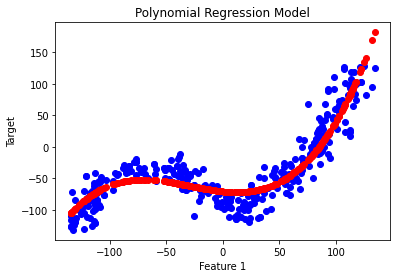

In [37]:
plt.scatter(X_test, Y_test, color='blue')
plt.scatter(X_test['input'],Y_pred,color='red')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Polynomial Regression Model')
plt.show()

->So At last this last model is the more accurate than others.

->As It is a Regression based problem so here we have to use the Mean Squared Error as the evaluation metrics.

->And MSE of the (polynomial regression with degree 3) is having the less error. So it is more accurate than Others.